<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/%D0%94%D0%97%22%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Визуализация данных"
### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:
* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import pandas as pd
import numpy  as np
import seaborn  as sns

from matplotlib import pyplot as plt

Недавно много шума наделал Covid-19. Решил узнать какая вакцина круче.Почему-то [Ссылка](https://github.com/owid/covid-19-data/blob/496dda40e4c19c3a7cf60a5baa0ecbd4878beac6/public/data/vaccinations/vaccinations-by-manufacturer.csv) через *pd.read_csv()* не прочиталась, пришлось скачать. Информация сегодняшняя.

In [2]:
sns.set_theme(style='darkgrid')
X = pd.read_csv('vaccinations-by-manufacturer.csv')

In [3]:
X.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20491
3,Argentina,2020-12-30,Sputnik V,40592
4,Argentina,2020-12-31,Sputnik V,43398


In [4]:
X.groupby('vaccine').total_vaccinations.sum().sort_values(ascending=False)

vaccine
Pfizer/BioNTech       1111318626774
Moderna                304409139379
Oxford/AstraZeneca      92924532500
Sinopharm/Beijing       39059543335
Johnson&Johnson         29176599406
Sinovac                 21323277921
Sputnik V               12836391555
Novavax                   401900119
CanSino                   350956743
Valneva                     3587221
Sputnik Light               2895019
Sanofi/GSK                  1701221
Covaxin                      128210
SKYCovione                    57304
Medicago                       2246
Name: total_vaccinations, dtype: int64

"*Sputnik V*" и "*Sputnik Light*" есть - это хрошо.

In [5]:
X.groupby('location').total_vaccinations.sum().sort_values(ascending=False)

location
European Union    645164917558
United States     205433575279
Japan             183523859069
Germany           104981008740
France             98712199387
Italy              91627493352
Argentina          64175932257
Peru               51262954731
South Korea        44863141037
Chile              15182285305
Czechia            12158406462
Hong Kong          11963908549
Switzerland        10617303624
Spain              10052963756
South Africa        9899594262
Romania             5346777289
Poland              5345360733
Ecuador             4460912722
Nepal               4379771383
Ukraine             4357666978
Canada              3722428506
Netherlands         3272173039
Belgium             2625631096
Uruguay             2610221127
Portugal            2321050040
Sweden              1979904756
Austria             1860626688
Hungary             1477619802
Denmark             1288002919
Norway              1202697488
Ireland             1142711191
Finland             1118147081

А вот России нет -- это плохо. Китая тоже нет.

In [6]:
X.groupby(['location', 'vaccine']).total_vaccinations.sum()

location       vaccine           
Argentina      CanSino                  287015240
               Moderna                 8208379860
               Oxford/AstraZeneca     12889767553
               Pfizer/BioNTech        11168760626
               Sinopharm/Beijing      20402835406
                                         ...     
United States  Novavax                    1778541
               Pfizer/BioNTech       119176342018
Uruguay        Oxford/AstraZeneca        24688923
               Pfizer/BioNTech         1602696661
               Sinovac                  982835543
Name: total_vaccinations, Length: 227, dtype: int64

<Axes: xlabel='vaccine'>

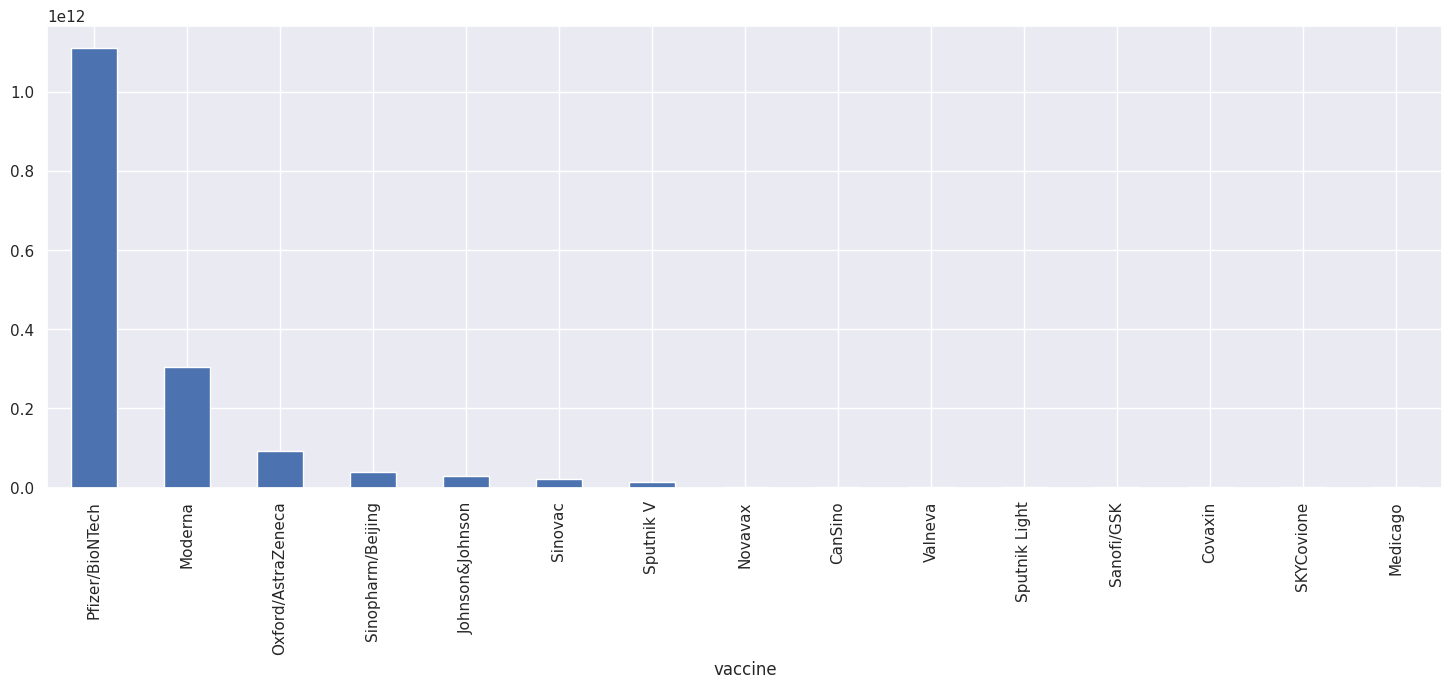

In [7]:
X.groupby('vaccine').total_vaccinations.sum().sort_values(ascending=False).plot.bar(figsize=(18,6))

Отрыв **Pfizer/BioNTech** огромен и всё портит.

<Axes: xlabel='location'>

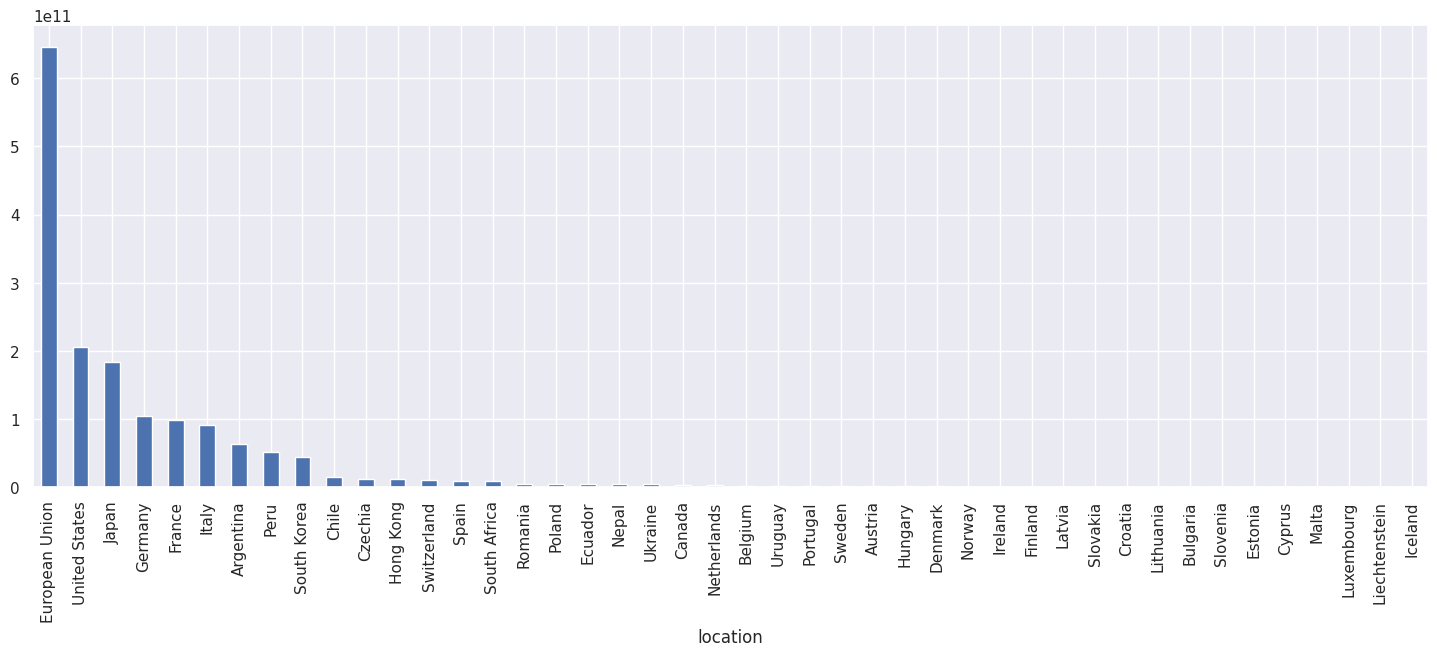

In [8]:
X.groupby('location').total_vaccinations.sum().sort_values(ascending=False).plot.bar(figsize=(18,6))

Больше всего прививалась **European Union**, хотя скорее всего в лидерах **Китай**, но он молчит. **Япония** на третьем месте, население немногим меньше российского, но мы тоже молчим.

<Axes: xlabel='date', ylabel='Density'>

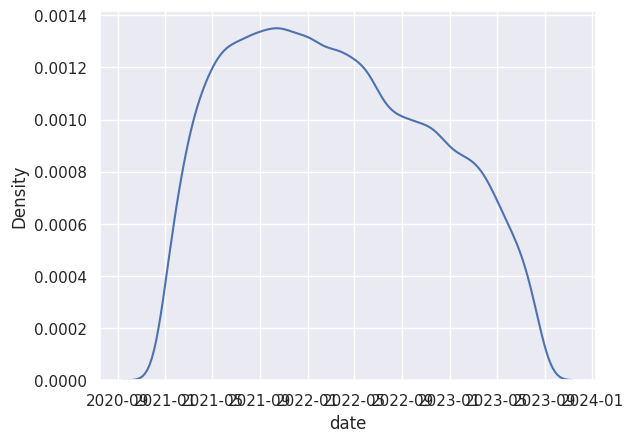

In [9]:
sns.kdeplot(data = X, x = pd.to_datetime(X['date']))

К сожалению не разобрался с подписью даты на оси Y. Но ясно, что пик прививания пришелся на начало 22 года.

In [10]:
y = X.pivot_table(index='location', columns='vaccine', values='total_vaccinations', aggfunc='sum')

Чтобы Пфайзер в Европе не портил картину, мы его обрежем :)

<Axes: xlabel='vaccine', ylabel='location'>

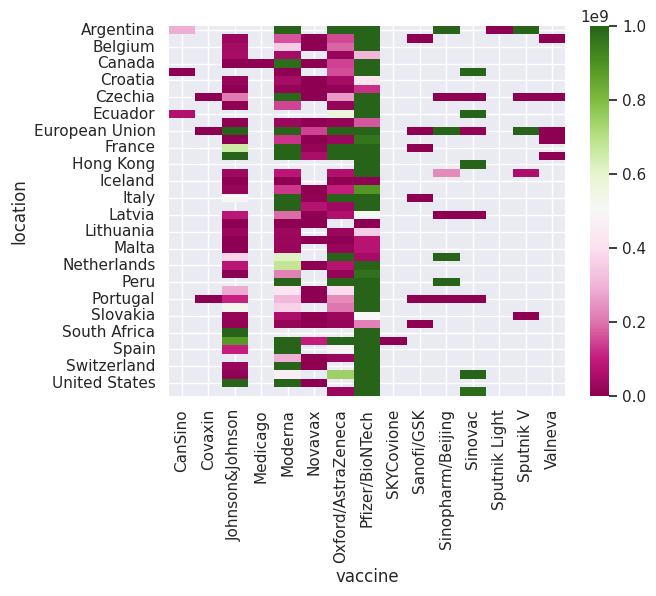

In [11]:
sns.heatmap(y, vmax=10**9, cmap="PiYG")

Всё равно разброс достаточно большой. Посмотрим в какой стране какая вакцина чаще используется.

<Axes: xlabel='location'>

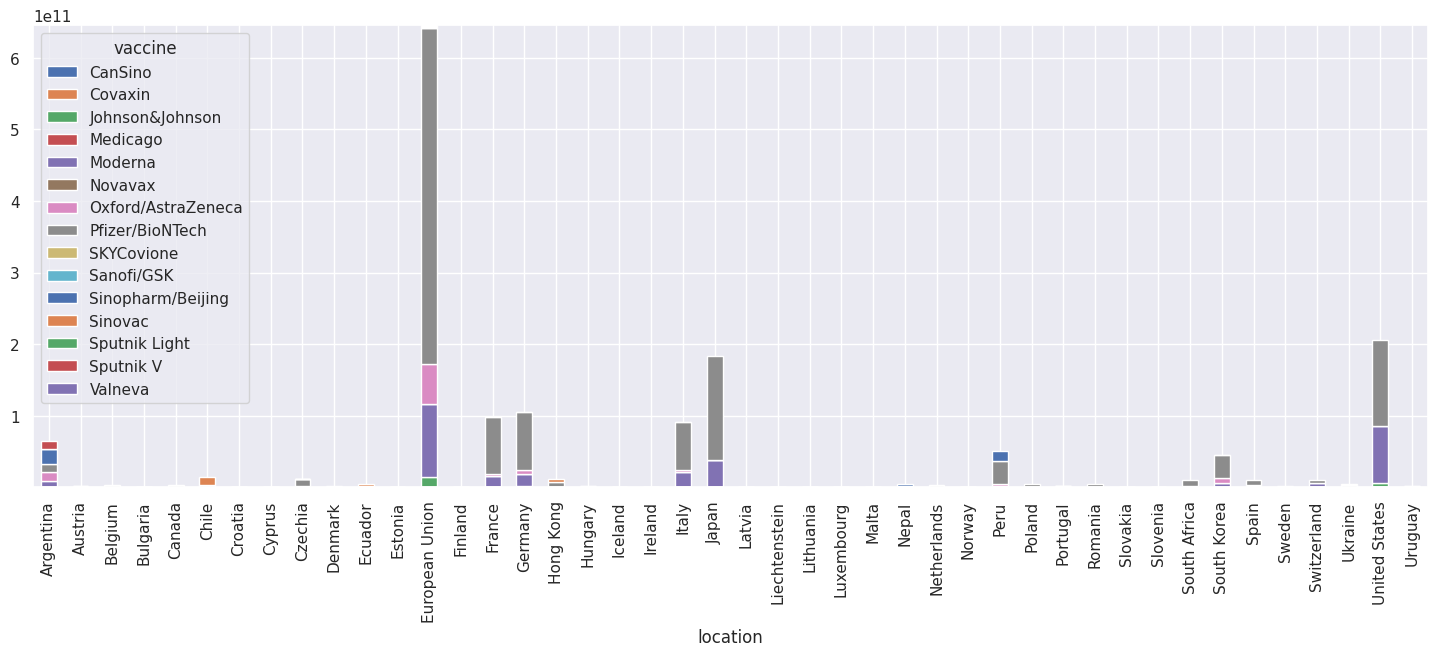

In [12]:
y.plot.bar(figsize=(18,6), stacked=True)

Вид не очень, нормируем данные.

In [13]:
z = X.groupby(['location', 'vaccine']).total_vaccinations.sum()/X.groupby(['location']).total_vaccinations.sum()

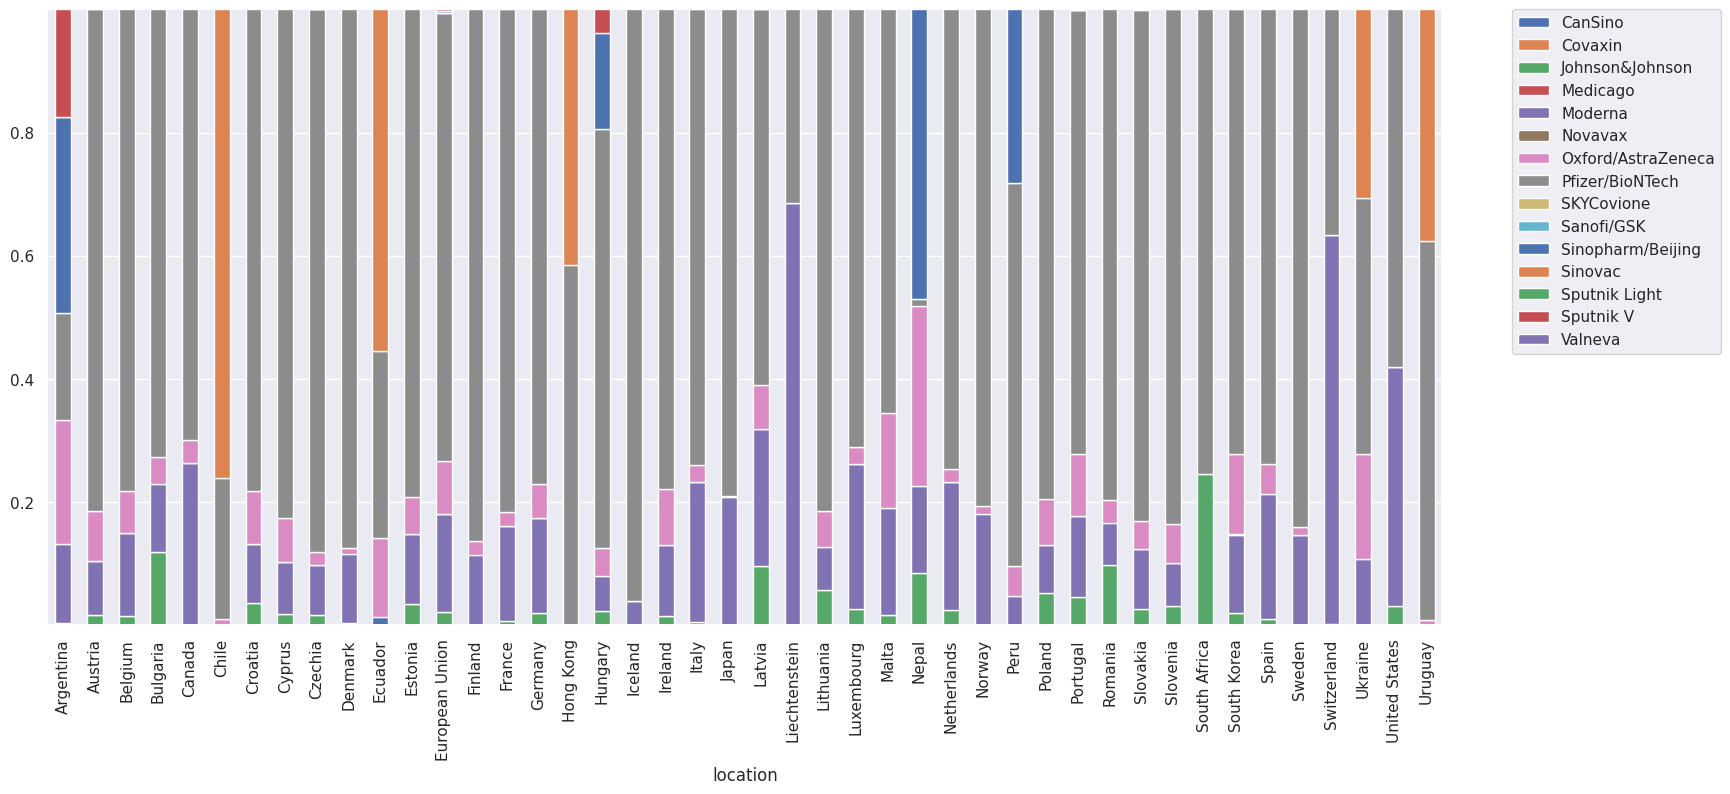

In [14]:
z.unstack().plot.bar(figsize=(18,8), stacked=True).legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

Так лучше:)